## For 3D visualization of the Arena itself after Calibration. To figure out the proper alingment for border detection - 


In [192]:
def rotation_correction_points(position_data,alpha=1.7):
    alpha = (alpha) * np.pi / 180
    rot_position_data = position_data
    rot_position_data[1] = position_data[1] * np.cos(alpha) - position_data[3] * np.sin(alpha)
    rot_position_data[3] = position_data[1] * np.sin(alpha) + position_data[3] * np.cos(alpha)
    return rot_position_data

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
root = '//10.153.170.3/storage2/fabian/data/project/CALIBRATION/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'

CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)
CALIB2  = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111759/position_20210610-111759.txt',sep=" ", header=None)    
CALIB3 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-112031/position_20210610-112031.txt',sep=" ", header=None)    

file = rotation_correction_points(CALIB1,alpha=0)
#file = CALIB1
import plotly.express as px
fig = px.line_3d( x=file[1], 
                   y=file[3], 
                   z=file[2],)


#fig.update_traces(contours_z=dict(show=True, usecolormap=True,
 #                                 highlightcolor="limegreen", project_z=True))
fig.show()


## Add rotation correction: 
    

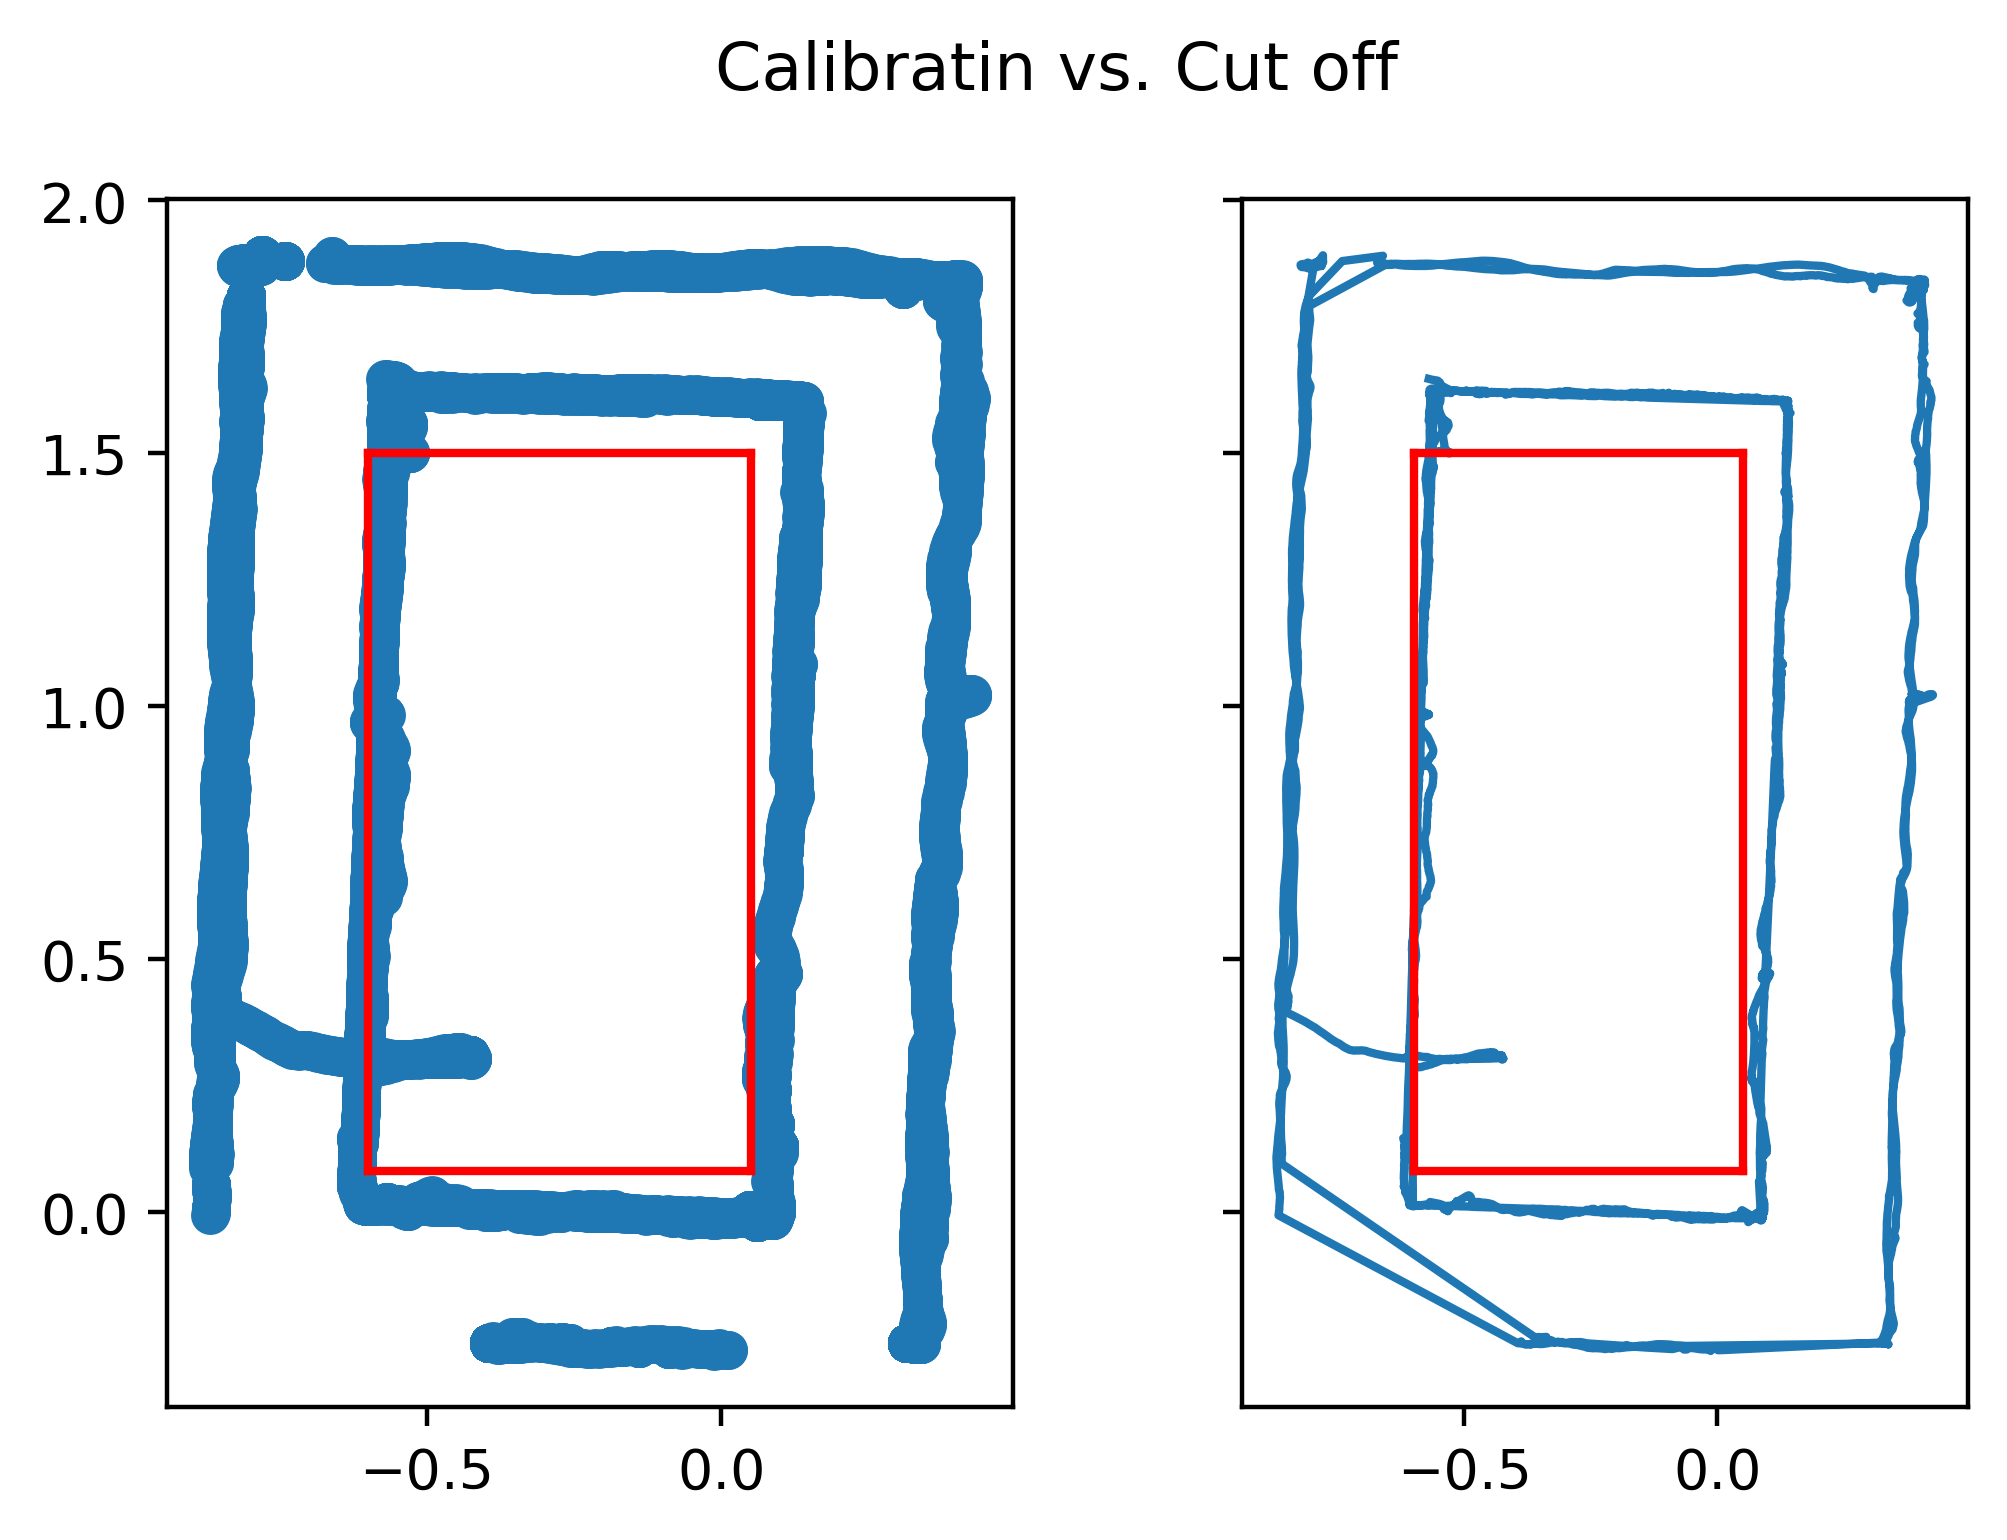

In [194]:
X_cut_min = -.6
Y_cut_max = 1.5
X_cut_max = .05
Y_cut_min = .08

# X_cut_min = -.6
# Y_cut_max = 1.5
# X_cut_max = .1
# Y_cut_min = .08

cut=0
position_data= CALIB1

    
#rot_position_data=  rotation_correction_points(position_data)
rot_position_data = position_data
xcut_offset=0#-.28
ycut_offset=0# -.83
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True,dpi=400, sharey=True)
fig.suptitle("Calibratin vs. Cut off ")
ax1.scatter(rot_position_data[1],rot_position_data[3])
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_max-cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_min+cut)+ycut_offset] ,'r-')
#ax1.scatter(rr[4],rr[5],s=220,marker='o', facecolors='none', edgecolors='green')   
    
ax2.plot(rot_position_data[1],rot_position_data[3])
ax2.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
plt.gca().set_aspect('equal')
plt.savefig('%sCalibratin vs. Cut off2.png'%(figures), dpi = 400)
plt.show()



#     count=0
#     for i in np.arange(len(norm_x)):
#         if max(norm_y[i])<(Y_cut_max-cut) and max(norm_x[i])<(X_cut_max-cut)and min(norm_y[i])>(Y_cut_min+cut)and min(norm_x[i])>(X_cut_min+cut):
#             count +=1
#     percentage = count/len(norm_x)*100
#     return (cut,seconds_back,percentage)
# np.asarray(Borderless_histogram(CALIB1,FS03_beacon,cut=0,seconds_back=2))

## Different rotations... also with offsets to center the arena - As the beacons are position with 0,0 being the center of the arena one needs to find a translation for all trajectories and rotation so that both are alignes  Easiest would be to have it all centered in 0.0 then there is no need to allign beacons but would need to allign all the positions. 


### Offsets for beacon file - used to be hardcoded 

In [67]:
x_max, x_min = 0.2, -0.76
x_offset = x_max - (x_max - x_min)/2
y_max, y_min = 0.072,  -1.754
y_offset = y_max - (y_max - y_min)/2
print(x_offset,y_offset)

-0.27999999999999997 -0.8410000000000001


## Now plots with different offsets and calib points 

In [147]:
def rotation_correction_points(position_data,alpha=2.5):
    alpha = (alpha) * np.pi / 180
    rot_position_data = position_data
    rot_position_data[1] = position_data[1] * np.cos(alpha) - position_data[2] * np.sin(alpha)
    rot_position_data[2] = position_data[1] * np.sin(alpha) + position_data[2] * np.cos(alpha)
    return rot_position_data

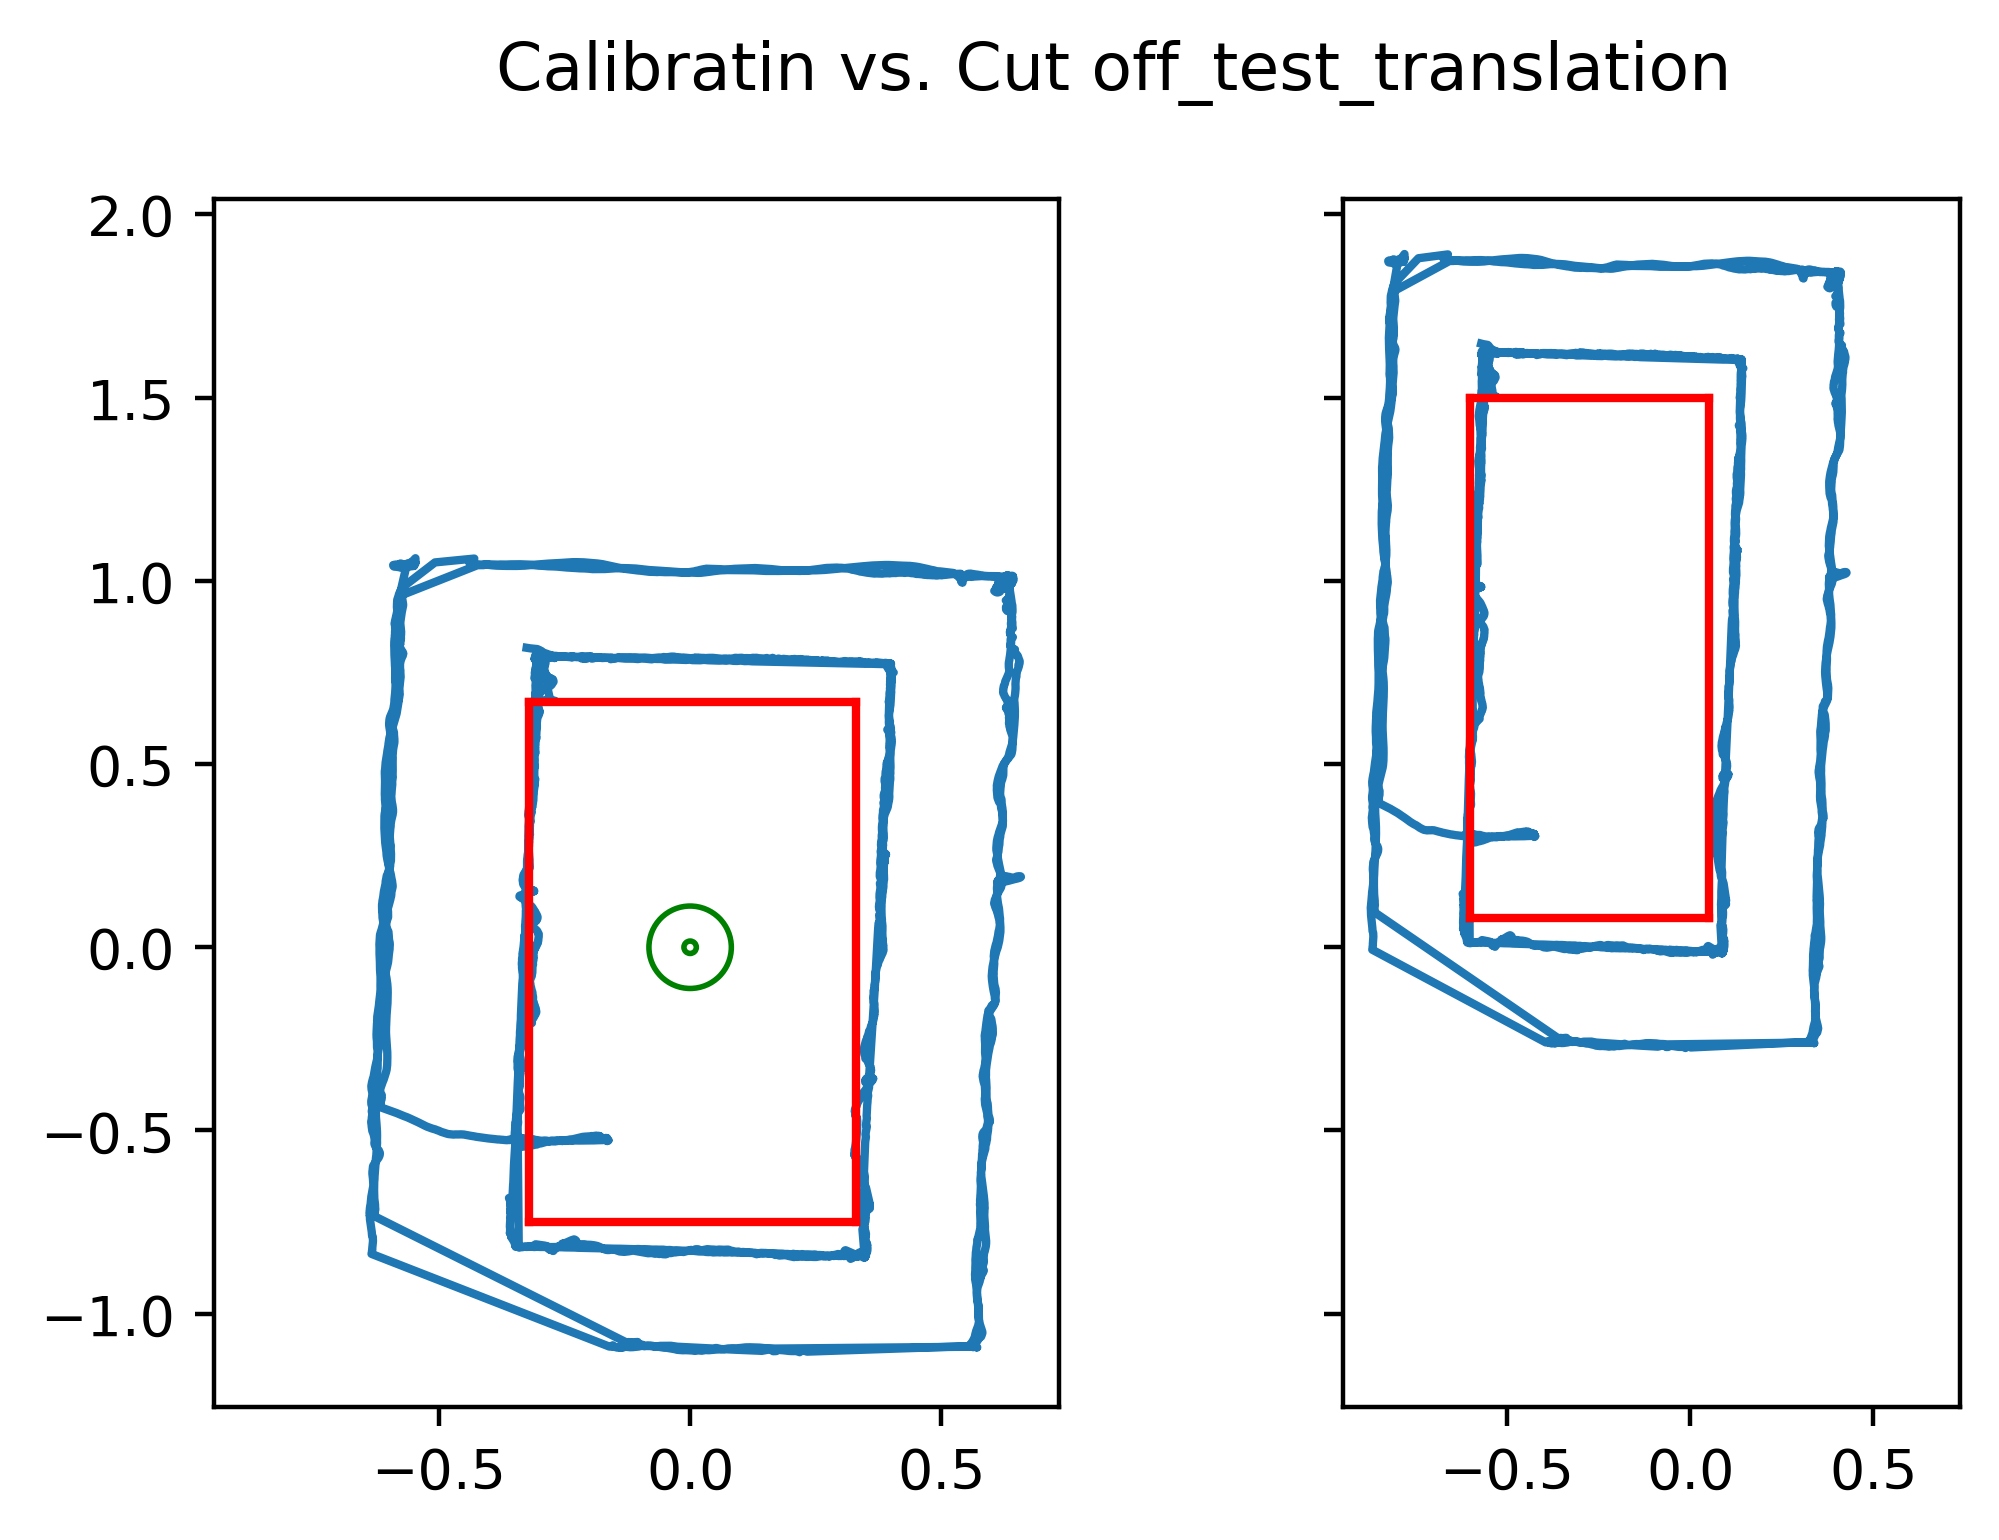

In [112]:
X_cut_min = -.6
Y_cut_max = 1.5
X_cut_max = .05
Y_cut_min = .08

# X_cut_min = -.6
# Y_cut_max = 1.5
# X_cut_max = .1
# Y_cut_min = .08
xcut_pre_offset=-.28
ycut_pre_offset=.83
cut=0
CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)    
CALIB1[1]= CALIB1[1]-xcut_pre_offset
CALIB1[3]= CALIB1[3]-ycut_pre_offset

rot_position_data=  rotation_correction_points(CALIB1,alpha=2.5)
CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)
#rot_position_data = position_data
xcut_offset=-.28
ycut_offset=-.83
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True,dpi=400, sharey=True)
fig.suptitle("Calibratin vs. Cut off_test_translation")
ax1.plot(rot_position_data[1],rot_position_data[3])
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_max-cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_min+cut)+ycut_offset] ,'r-')
ax1.scatter(0,0,s=220,marker='o', facecolors='none', edgecolors='green') 
ax1.scatter(0,0,s=20,marker='.', facecolors='none', edgecolors='green') 
    
ax2.plot(CALIB1[1],CALIB1[3])
ax2.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
plt.gca().set_aspect('equal')
plt.savefig('%sCalibratin vs. Cut off _test_translation.png'%(figures), dpi = 400)
plt.show()

### Translation and then Rotation 

In [150]:
x_max, x_min = 0.12, -0.62
x_offset = x_max - (x_max - x_min)/2
y_max, y_min = 1.602,  0
y_offset = y_max - (y_max - y_min)/2
print(x_offset,y_offset)

-0.25 0.801


## (xcosθ−ysinθ ,xsinθ+ycosθ).

In [154]:
def rotation_correction_points(position_data,alpha=2.5):
    """Function take position ias X Z and Y and corrects for rotation. """
    alpha = (alpha) * np.pi / 180
    rot_position_data = position_data
    rot_position_data[1] = position_data[1] * np.cos(alpha) - position_data[3] * np.sin(alpha)
    rot_position_data[3] = position_data[1] * np.sin(alpha) + position_data[3] * np.cos(alpha)
    return rot_position_data

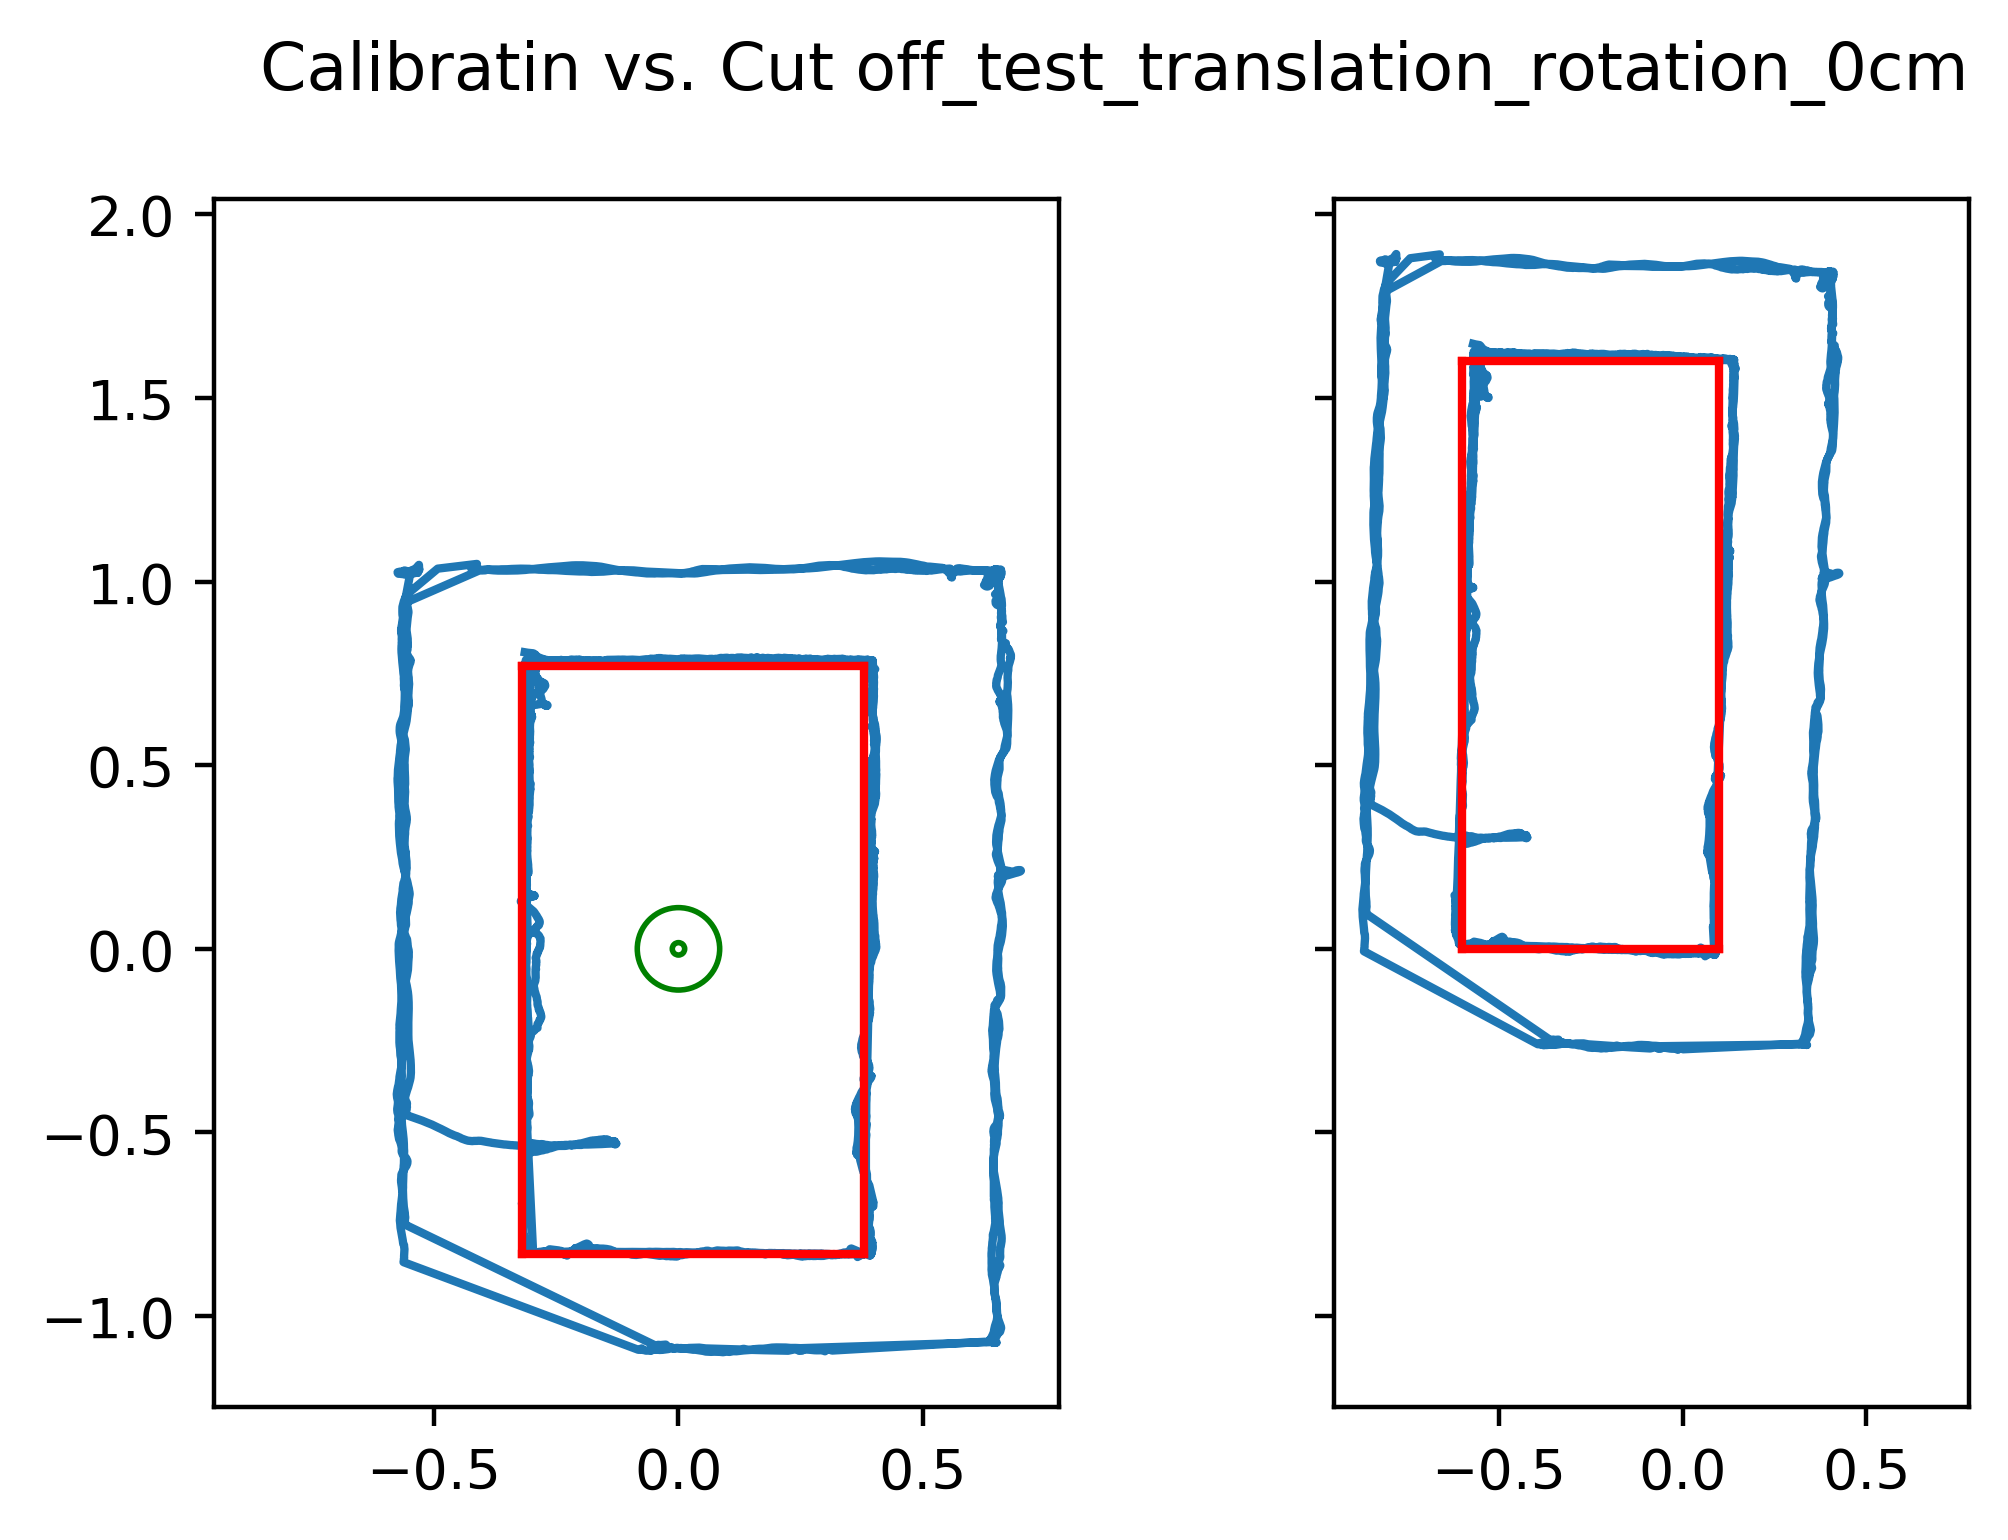

In [184]:
X_cut_min = -.6
Y_cut_max = 1.6
X_cut_max = .1
Y_cut_min = .00
print("area %s" %s(X_cut_min-) 

xcut_pre_offset=-.28
ycut_pre_offset=.83
cut=.0 #How many meters to cut out? 
CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)    
CALIB1[1]= CALIB1[1]-xcut_pre_offset
CALIB1[3]= CALIB1[3]-ycut_pre_offset

rot_position_data=  rotation_correction_points(CALIB1,alpha=1.7)
CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)
#rot_position_data = position_data
xcut_offset=-.28
ycut_offset=-.83
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True,dpi=400, sharey=True)
fig.suptitle("Calibratin vs. Cut off_test_translation_rotation_0cm")
ax1.plot(rot_position_data[1],rot_position_data[3])
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_max-cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_min+cut)+ycut_offset] ,'r-')
ax1.scatter(0,0,s=220,marker='o', facecolors='none', edgecolors='green') 
ax1.scatter(0,0,s=20,marker='.', facecolors='none', edgecolors='green') 
    
ax2.plot(CALIB1[1],CALIB1[3])
ax2.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
plt.gca().set_aspect('equal')
plt.savefig('%sCalibratin vs. Cut off _test_translation_rotation_0cm.png'%(figures), dpi = 400)
plt.show()